### Start off by reading the data into a matrix

In [1]:
import pandas as pd
import numpy as np


pos_df = pd.read_table("pos.txt", header=None)
pos_df.columns = ["pos"]
neg_df = pd.read_table("neg.txt", header=None)
neg_df.columns = ["neg"]

df = pd.DataFrame(columns=["pos", "neg"])
df["pos"] = pos_df["pos"]
df["neg"] = neg_df["neg"]

print(df.shape)

(17890, 2)


### Find the most common words in each file. What are they? Are some of them clearly general terms relating to the nature of the data, and not just the emotion?


Here we simply concatenate all the reviews to form a single large block of text for each class. The most common words contain generally common words like "use" and "car".


In [2]:
from collections import Counter

pos_most_common = Counter(" ".join(df["pos"].dropna()).split()).most_common(10)
neg_most_common = Counter(" ".join(df["neg"].dropna()).split()).most_common(10)
print("Positive most common")
print(pos_most_common)
print("Negative most common")
print(neg_most_common)


Positive most common
[('use', 14625), ('car', 8028), ('work', 7550), ('one', 6594), ('veri', 5586), ('product', 5565), ('great', 5323), ('well', 5067), ('good', 4974), ('up', 4855)]
Negative most common
[('use', 891), ('one', 594), ('product', 592), ('work', 561), ('car', 503), ('out', 425), ('up', 382), ('veri', 365), ('good', 351), ('light', 329)]


### Compute a TF/IDF vector for each of the text files, and make them into a 2 x m matrix, where m is the number of unique words in the data.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ignore too common terms (max_df = .25)
v_pos = TfidfVectorizer(max_df = .25)
X_pos = v_pos.fit_transform(df['pos'])
v_neg = TfidfVectorizer(max_df = .25)
X_neg = v_neg.fit_transform(df["neg"].dropna())

# Confirm shapes
print(X_pos.shape)
print(X_neg.shape)


(17890, 33954)
(1147, 7607)


### List the words with the highest TF/IDF score in each class, and compare them to the most common words. What do you notice?

In our case unfortunately the results aren't much better. However, we can still see that the positive words are clearly more positive.

In [11]:
# Sort by mean of each word
pos_highest =  [v_pos.get_feature_names()[id] for id in (-X_pos.mean(axis=0).A).argsort()[0][:10]]
neg_highest = [v_neg.get_feature_names()[id] for id in (-X_neg.mean(axis=0).A).argsort()[0][:10]]

print("Positive highest score")
print(pos_highest)
print("Negative highest score")
print(neg_highest)

Positive highest score
['car', 'great', 'product', 'one', 'veri', 'good', 'well', 'easi', 'up', 'out']
Negative highest score
['car', 'light', 'veri', 'good', 'up', 'time', 'fit', 'tri', 'dont', 'buy']


### Plot the words in each class and their corresponding TF/IDF scores. Note that there will be a lot of words, so you'll have to think carefully to make your chart clear! If you can't plot them all, plot as much as you can.

In [12]:
inds = (-X_pos.mean(axis=0).A).argsort()[0]

pos_scores = np.squeeze(X_pos.mean(axis=0).A)[inds]
pos_words = np.array(v_pos.get_feature_names())[inds]

# Looks ok
print(pos_scores[:10], pos_words[:10])

inds = (-X_neg.mean(axis=0).A).argsort()[0]

neg_scores = np.squeeze(X_neg.mean(axis=0).A)[inds]
neg_words = np.array(v_neg.get_feature_names())[inds]

[ 0.02628166  0.02592304  0.02308373  0.02292087  0.02270307  0.02191673
  0.0213796   0.01869134  0.01743134  0.01719104] ['car' 'great' 'product' 'one' 'veri' 'good' 'well' 'easi' 'up' 'out']


### Car-shaped wordclouds of each class

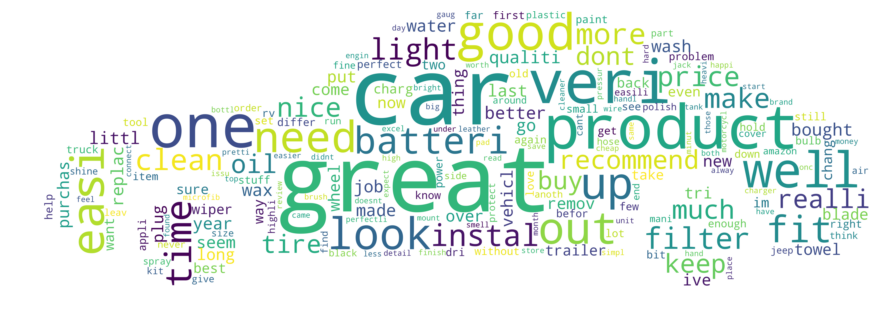

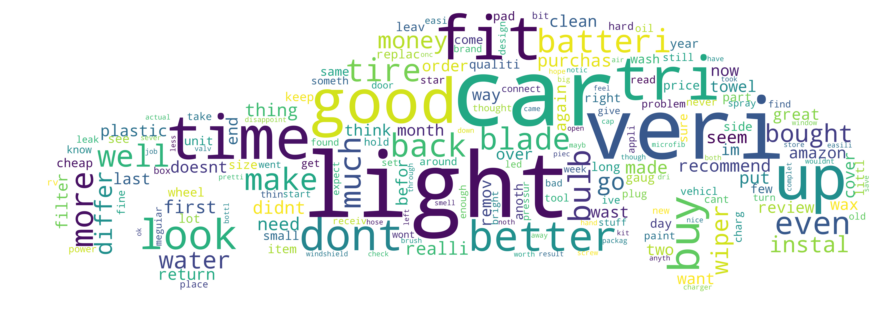

In [13]:
from PIL import Image
from wordcloud import WordCloud
from os import path
import PIL.ImageOps    
import matplotlib.pyplot as plt

im = Image.open("lol.png")
mask = np.array(im)
wordcloud = WordCloud(mask=mask, background_color="white", width=1000, height=1000, scale=4)

wordcloud.generate_from_frequencies(dict(zip(pos_words, pos_scores)))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

wordcloud = WordCloud(mask=mask, background_color="white", width=1000, height=1000, scale=4)

wordcloud.generate_from_frequencies(dict(zip(neg_words, neg_scores)))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()